In [ ]:
# K-NEAREST NEIGHBOURS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = '/content/Zoo.csv'
df = pd.read_csv(file_path)


In [ ]:
 # Task 1: Analyze the Data Using Visualizations

In [5]:
print(df.head(10))

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   
5     buffalo     1         0     0     1         0        0         0   
6        calf     1         0     0     1         0        0         0   
7        carp     0         0     1     0         0        1         0   
8     catfish     0         0     1     0         0        1         1   
9        cavy     1         0     0     1         0        0         0   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1   

In [6]:
print(df.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [ ]:
# Filter only numeric columns for correlation

In [12]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
# Check if there are numeric columns to plot

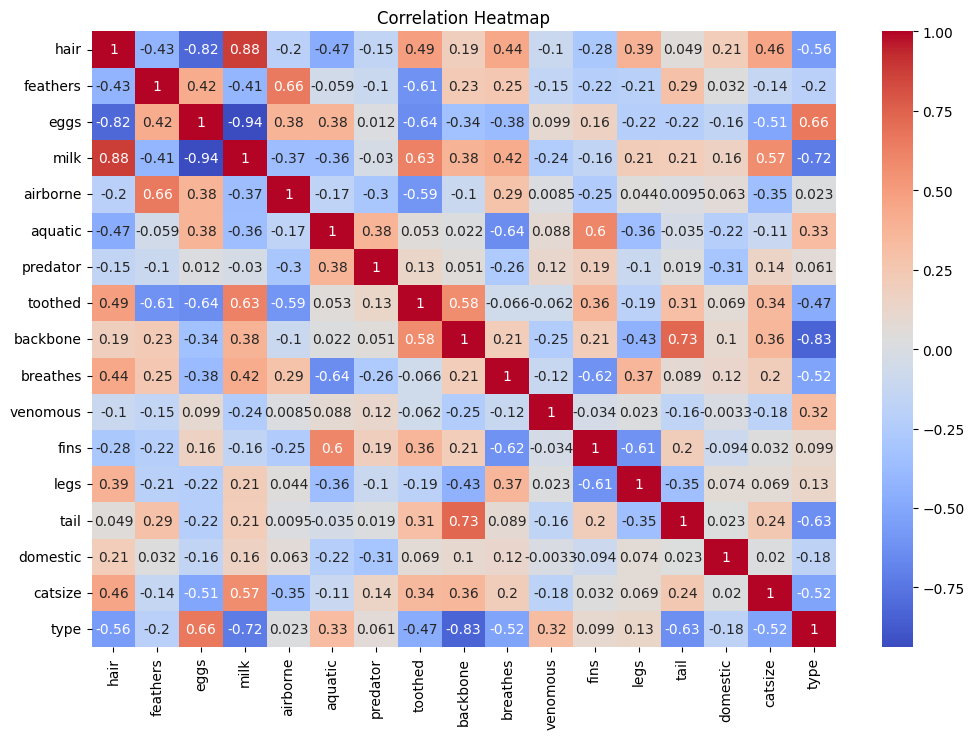

In [13]:
if df_numeric.shape[1] > 0:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns to plot a correlation heatmap.")

In [ ]:
# Task 2: Preprocess the Data (Handling Missing Values and Outliers)

In [15]:
# Check for missing values
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


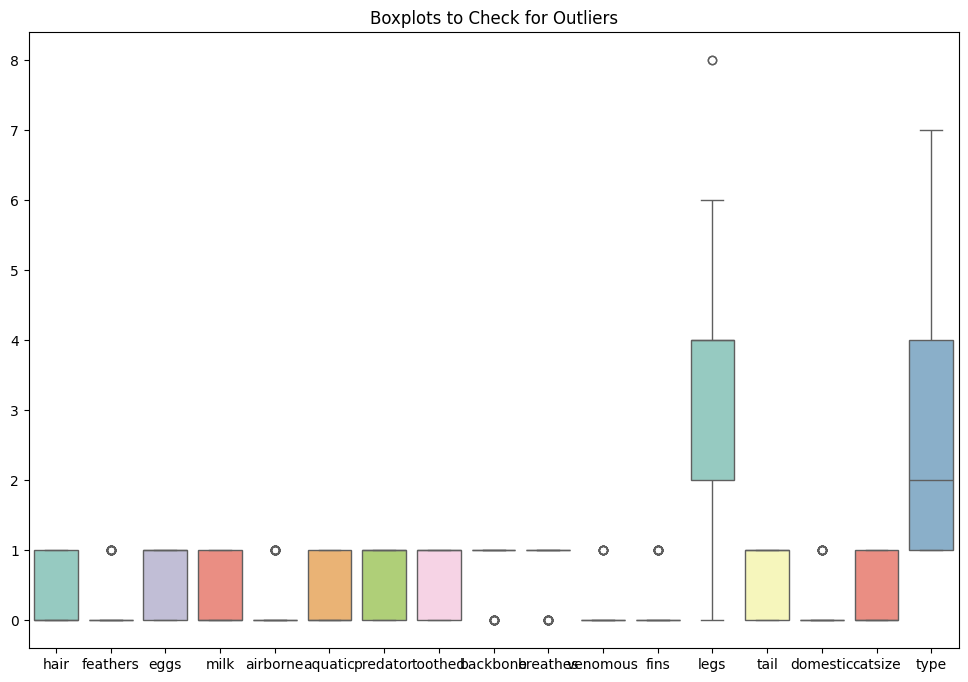

In [17]:
# Check for outliers using boxplots
plt.figure(figsize=(12, 8))
df_numeric = df.select_dtypes(include=['float64', 'int64'])  # Select numeric columns
sns.boxplot(data=df_numeric, palette='Set3')
plt.title('Boxplots to Check for Outliers')
plt.show()

In [ ]:
# Since no missing values were detected (if any, we can use df.fillna() to fill them)
# For outliers, we would need to handle them case-by-case if required
# In this case, let's assume the dataset is clean, but we can apply transformations if needed

# Optional: Scaling the data if needed (e.g., StandardScaler or MinMaxScaler can be used)

In [ ]:
# Task 3: Split the Dataset into Training and Testing Sets


In [18]:
from sklearn.model_selection import train_test_split


In [ ]:
# Define X (features) and y (target)

In [26]:
X = df.drop(columns=['animal name', 'type'])  # Drop non-numeric columns and target
y = df['type']  # Target variable is class_type


In [27]:

# Split the dataset: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (80, 16)
Testing set size: (21, 16)


In [ ]:
# Task 4: Implement the K-Nearest Neighbors Algorithm

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialize KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)

In [33]:
# Train the model on the training set
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [34]:
# Make predictions on the testing set
y_pred = knn.predict(X_test)

In [ ]:
# Task 5: Choose an Appropriate Distance Metric and Value for K

In [35]:
# Using Euclidean distance (default metric)
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)


In [36]:
# Using Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)

In [ ]:
# Task 6: Evaluate Classifier's Performance (Accuracy, Precision, Recall, F1-Score)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [38]:
# Evaluate the Euclidean model
accuracy = accuracy_score(y_test, y_pred_euclidean)
precision = precision_score(y_test, y_pred_euclidean, average='weighted')
recall = recall_score(y_test, y_pred_euclidean, average='weighted')
f1 = f1_score(y_test, y_pred_euclidean, average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.9047619047619048
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1-Score: 0.8957902001380263


In [40]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_euclidean))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


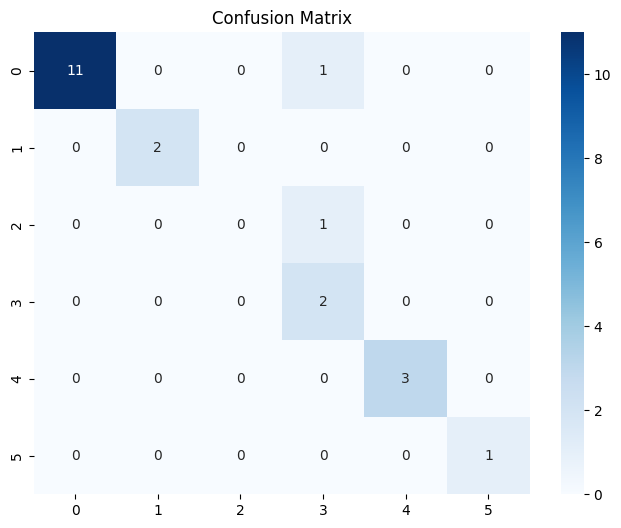

In [41]:
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_euclidean), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Task 7: Visualize the Decision Boundaries of the Classifier

In [42]:
# Example: Selecting the first two features for visualization
X_train_2d = X_train.iloc[:, :2]  # Selecting two features for simplicity
X_test_2d = X_test.iloc[:, :2]


In [43]:
# Retrain the model using only 2 features
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_2d, y_train)

KNeighborsClassifier()

In [46]:
# Plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


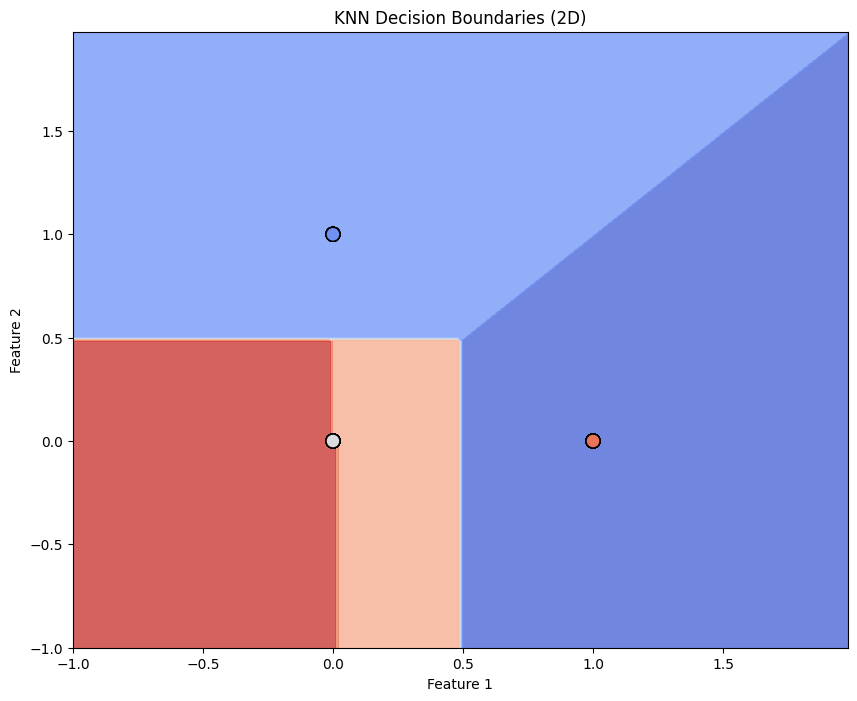

In [47]:
# Plotting decision boundaries for the reduced 2D case
plot_decision_boundaries(X_train_2d, y_train, knn_2d, "KNN Decision Boundaries (2D)")

**plot_decision_boundaries:**

1. This function creates a visual representation of the decision boundaries of the KNN classifier.

2. Decision boundaries are the dividing lines that separate different classes as predicted by the KNN model. The classifier predicts that any point on one side of the boundary belongs to one class, and points on the other side belong to another class.

In this case, the decision boundaries are drawn in a 2D space based on the two selected features.

**Interview Questions:**

# **# 1. What are the key hyperparameters in KNN?

Key hyperparameters in the K-Nearest Neighbors (KNN) algorithm are:

1. Number of Neighbors (K): This is the most important hyperparameter in KNN. It represents the number of nearest neighbors the algorithm will consider when making a prediction. A lower K value can make the model sensitive to noise, while a higher K value smooths the decision boundaries but may reduce model sensitivity to patterns.
Example: K=3 means the 3 nearest neighbors will vote to determine the class.

2.Distance Metric: The distance metric defines how the distance between data points is measured. Common metrics include Euclidean distance, Manhattan distance, and others (discussed in the next question).
Example: metric='euclidean' for Euclidean distance.

3. Weights: This hyperparameter defines how the neighbors' votes are weighted. Two common settings are:

'uniform': All neighbors contribute equally to the decision.
'distance': Closer neighbors are weighted more heavily than those farther away.
Example: weights='distance' gives more influence to nearer neighbors.

4. Algorithm: This parameter defines the algorithm used to compute nearest neighbors, impacting the model's speed.

'auto': Automatically chooses the best algorithm based on the data.
'ball_tree', 'kd_tree', and 'brute' are other options for handling large datasets more efficiently.

5.Leaf Size (leaf_size): When using tree-based algorithms like 'kd_tree' or 'ball_tree', this hyperparameter controls the size of the leaves in the tree. It can affect the speed of both training and query processes.

## 2. **What distance metrics can be used in KNN?**

KNN uses different distance metrics to compute the "closeness" between data points. Common distance metrics include:

1.Euclidean Distance: This is the most common distance metric in KNN and represents the ordinary straight-line distance between two points in Euclidean space. It is calculated as:

d(p,q)=
∑(p
i
​
 −q
i
​
 )
2

​
This metric works well for many datasets, especially when features have the same units of measurement.

2. Manhattan Distance (L1 norm): Also known as "city block" distance, it is the sum of the absolute differences between the coordinates of the points:
d(p,q)=∑∣p
i
​
 −q
i
​
 ∣
 It works well for high-dimensional data and when you expect each feature to contribute equally.

 3. Minkowski Distance: This is a generalization of both Euclidean and Manhattan distances.
  It is defined as:

 d(p,q)=(∑∣p
i
​
 −q
i
​
 ∣
p
 )
1/p

When
𝑝
=
2
p=2, it becomes Euclidean distance.

When
𝑝
=
1
p=1, it becomes Manhattan distance.
 Minkowski distance allows you to adjust how you measure distance by tuning the p parameter.
 4. Chebyshev Distance: This distance is based on the maximum absolute difference between coordinates of the points. It is used in cases where you care only about the largest difference:

 d(p,q)=max∣p
i
​
 −q
i
​
 ∣

5. Hamming Distance: Used when dealing with categorical or binary features, it calculates the number of positions at which corresponding elements are different:

d(p,q)=∑I(p
i
​

=q
i
​
 )
It is particularly useful in text or string matching.
  6. Mahalanobis Distance: This is a distance metric that accounts for correlations between variables, which makes it useful in cases where features are highly correlated. It requires the covariance matrix of the data.


  In summary, the choice of distance metric depends on the nature of your data and the problem you're trying to solve. Euclidean distance is the default, but other metrics may be more appropriate for specific data structures or feature types.






